# Exponential and Laplace distribution
Two closely related probability distributions.

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np
from scipy.stats import expon

default_color = "#81b69d"

## Exponential distribution 

![expon](./_static/expon.gif)

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) defined as 

$$
p(x;\lambda) = \begin{cases}
\lambda  e^{ - \lambda x} & x \ge 0, \\
0 & x < 0.
$$

allows us to place a sharp point at x = 0. An interesting property of this distribution is it being 
[memoryless](https://en.wikipedia.org/wiki/Memorylessness)

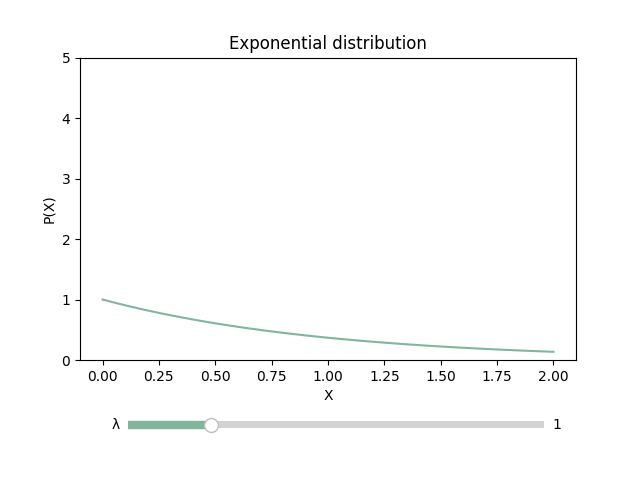

In [2]:
x = np.linspace(0, 2, 1000)

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.25)

ax_slider = fig.add_axes([0.2, 0.1, 0.65, 0.03])

def update_lambda(val):
    ax.cla()
    ax.set_ylim(0,5)
    ax.plot(x, expon.pdf(x, scale=1/val), color=default_color)
    ax.set_xlabel('X')
    ax.set_ylabel('P(X)')
    ax.set_title('Exponential distribution')
    fig.canvas.draw_idle()

slider_x = Slider(
    ax = ax_slider,
    label="λ",
    valmin=0,
    valmax=5,
    valinit=1,
    color=default_color)

slider_x.on_changed(update_lambda)

ax.set_ylim(0,5)
update_lambda(1)
plt.show()

## Laplace distribution

![laplace](./_static/laplace.gif)

The [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) allows to place a sharp peak at $ \mu $ ("location parameter") with an additional parameter 
$ \gamma $ ("scale parameter"). It is defined as: 

$$
p(x;\mu;\gamma) = \frac{1}{2\gamma} e^{\frac{- \abs{x-\mu}}{\gamma}}
$$

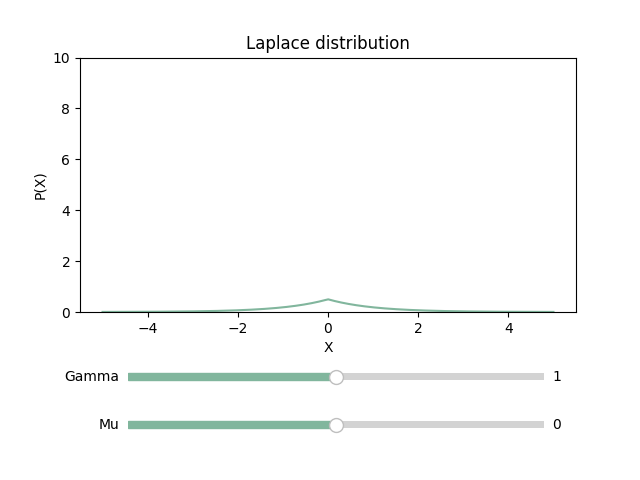

In [3]:
x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.35)

ax_mu = fig.add_axes([0.2, 0.1, 0.65, 0.03])
ax_gamma = fig.add_axes([0.2, 0.2, 0.65, 0.03])

mu_init = 0
gamma_init = 1

def update(val):
    ax.cla()
    mu = mu_slider.val
    gamma = gamma_slider.val
    ax.set_ylim(0,10)
    ax.plot(x, (1/(2*gamma)*np.exp(-(abs(x-mu))/gamma)), color=default_color)
    ax.set_xlabel('X')
    ax.set_ylabel('P(X)')
    ax.set_title('Laplace distribution')
    fig.canvas.draw_idle()

mu_slider = Slider(
    ax = ax_mu,
    label="Mu",
    valmin=-5,
    valmax=5,
    valinit=mu_init,
    color=default_color)

gamma_slider = Slider(
    ax = ax_gamma,
    label="Gamma",
    valmin=0,
    valmax=2,
    valinit=gamma_init,
    color=default_color)

mu_slider.on_changed(update)
gamma_slider.on_changed(update)

update(0)
plt.show()

```{note}
The output in this jupyter book will unfortunately not be interactive. This is because the widgets require 
a running python kernel, but jupyter books renders markdown and .ipynb files into html (so no Python 
kernel running).
```